# Figure 1 Data

Folder contains data generating figure 1 of our article. They include:
- "newtimerelax_poly12.txt": relaxation time data of Poly-(12,0) glass former as a function of inverse temperature
- "msd_0.1278.txt": MSD of Poly-(12,0) glass former at low temperature (T=0.1278)
- "msd_0.5179.txt": MSD of Poly-(12,0) glass former at high temperature (T=0.5179)
- "dispmag.txt": a short-time trajectory of single-particle displacement magnitude at low temperatures in Poly-(12,0) glass former.
- "is_dispmag.txt": a short-time inherent-state (IS) trajectory of single-particle displacement magnitude at low temperatures in Poly-(12,0) glass former

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['text.usetex'] = True

def lin(x,a,b):
    return a*x+b

def red():
    return '#d65858'
def blue():
    return '#1E90FF'
def black():
    return '#000000'
def orange():
    return '#FF8C00'
def brown():
    return '#A52A2A'
def darkorchid():
    return '#9932CC'
def darkgreen():
    return '#006400'

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Relaxation Time (Figure 1A)

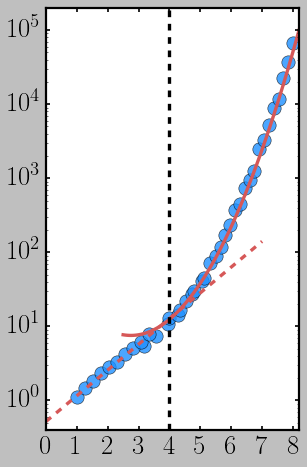

In [11]:
path = "./"
tau_eq_data = np.loadtxt(path+"newtimerelax_poly12.txt")

fig, ax1 = plt.subplots(figsize=(4,6))
# fig, ax1 = plt.subplots(figsize=(6,4))


plot_tau_relax = plt.plot(tau_eq_data[:,0],tau_eq_data[:,1])

plt.setp(plot_tau_relax, 'linewidth', 0, 'color', blue(), linestyle='-',marker='o', markersize=12, alpha=0.8)
# plt.setp(plot_low_T_msd, 'linewidth', 3, 'color', blue(), linestyle='-',marker='o', markersize=0, alpha=0.8)

# invT_low = np.linspace(2.0,4.1,100)
invT_low = np.linspace(0,7,100)
tau0 = 0.52
Ea   = 0.8
linarh_plt = tau0*np.exp(invT_low*Ea)

plot_arh_d = plt.plot(invT_low,linarh_plt)

plt.setp(plot_arh_d, 'linewidth', 3, 'color', red(), linestyle='--',marker='o', markersize=0, alpha=1)

invT_high = np.linspace(2.5,9,100)
J2   = 0.32
tau0 = 85
Ea   = 0.8
b0   = 4.0
prlbarh_plt = tau0*np.exp(invT_high*(Ea-2.0*b0*J2)+J2*invT_high*invT_high)

plot_prbl_arh_d = plt.plot(invT_high,prlbarh_plt)

plt.setp(plot_prbl_arh_d, 'linewidth', 3, 'color', red(), linestyle='-',marker='o', markersize=0, alpha=1)

plot_onset = plt.plot([4,4],[4e-1,1e6])

plt.setp(plot_onset, 'linewidth', 3, 'color', black(), linestyle='--',marker='o', markersize=0, alpha=1)


ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.0)
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)
# Change the size of the fontsize
axfontsize = 24

for tick in ax1.xaxis.get_major_ticks():
      tick.label1.set_fontsize(axfontsize)
for tick in ax1.yaxis.get_major_ticks():
      tick.label1.set_fontsize(axfontsize)

# for tick in ax1.get_xticklabels():
#       tick.set_fontname("Arial")
# for tick in ax1.get_yticklabels():
#       tick.set_fontname("Arial")

every_nth_y = 1
for n, label in enumerate(ax1.yaxis.get_ticklabels()):
    if (n) % every_nth_y != 0:
        label.set_visible(False)

every_nth_x = 1
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if (n) % every_nth_x != 0:
        label.set_visible(False)

# ax1.set_xticklabels([])

plt.xlim([0,8.2])
plt.ylim([4e-1,2e5])

# ax1.set_xscale('log')
ax1.set_yscale('log')

plt.tight_layout()
plt.show()

## MSD (Part of Figure 1B)

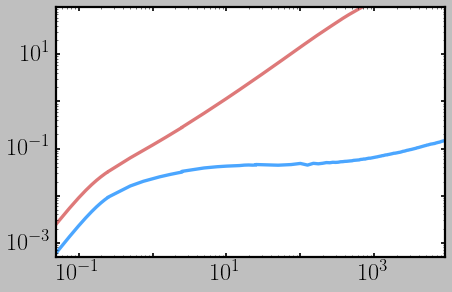

In [12]:
#MSD Data 
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

#path = "/content/drive/MyDrive/KT_Dipole_Dislocations_Presentation/Scripts_Paper/"
lowT_data  = np.loadtxt(path+"msd_0.1278.txt")
highT_data = np.loadtxt(path+"msd_0.5179.txt")

fig, ax1 = plt.subplots(figsize=(6,4))

plot_high_T_msd = plt.plot(highT_data[:,0],highT_data[:,1])
plot_low_T_msd  = plt.plot(lowT_data[:,0],lowT_data[:,1])

plt.setp(plot_high_T_msd, 'linewidth', 3, 'color', red(), linestyle='-',marker='o', markersize=0, alpha=0.8)
plt.setp(plot_low_T_msd, 'linewidth', 3, 'color', blue(), linestyle='-',marker='o', markersize=0, alpha=0.8)

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.0)
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)
# Change the size of the fontsize
axfontsize = 22

for tick in ax1.xaxis.get_major_ticks():
      tick.label1.set_fontsize(axfontsize)
for tick in ax1.yaxis.get_major_ticks():
      tick.label1.set_fontsize(axfontsize)

# for tick in ax1.get_xticklabels():
#       tick.set_fontname("Arial")
# for tick in ax1.get_yticklabels():
#       tick.set_fontname("Arial")

every_nth_y = 2
for n, label in enumerate(ax1.yaxis.get_ticklabels()):
    if (n) % every_nth_y != 0:
        label.set_visible(False)

every_nth_x = 2
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if (n) % every_nth_x != 0:
        label.set_visible(False)

ax1.set_xticklabels([])

plt.xlim([5e-2,9e3])
plt.ylim([5e-4,1e2])

ax1.set_xscale('log')
ax1.set_yscale('log')

plt.tight_layout()
plt.show()

## Displacement Trajectory (part of Figure 1C)

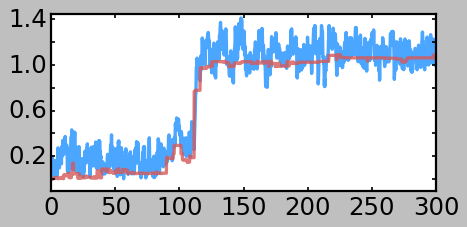

In [13]:
#Displacement short times 
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

plt.style.use('classic')
#path = "/content/drive/MyDrive/KT_Dipole_Dislocations_Presentation/Scripts_Paper/"
disp = np.loadtxt(path+"dispmag.txt")
isdisp = np.loadtxt(path+"is_dispmag.txt")

# plt.figure(figsize=(7,4))

rate = 2

# plt.plot(disp[::rate,0],disp[::rate,1],'-',lw=1.5,color='blue')
# plt.plot(isdisp[::rate,0],isdisp[::rate,1],'-',lw=2,color='red')

fig, ax1 = plt.subplots(figsize=(6,3))

plot_jump     = plt.plot(disp[::rate,0],disp[::rate,1])
plot_is_jump  = plt.plot(isdisp[::rate,0],isdisp[::rate,1])

plt.setp(plot_jump, 'linewidth', 3, 'color', blue(), linestyle='-',marker='o', markersize=0, alpha=0.8)
plt.setp(plot_is_jump, 'linewidth', 3, 'color', red(), linestyle='-',marker='o', markersize=0, alpha=0.8)

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.0)
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)

# Change the size of the fontsize
axfontsize = 22

for tick in ax1.xaxis.get_major_ticks():
      tick.label1.set_fontsize(axfontsize)
for tick in ax1.yaxis.get_major_ticks():
      tick.label1.set_fontsize(axfontsize)

every_nth_y = 2
for n, label in enumerate(ax1.yaxis.get_ticklabels()):
    if (n) % every_nth_y != 0:
        label.set_visible(False)

every_nth_x = 1
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if (n) % every_nth_x != 0:
        label.set_visible(False)

# ax1.set_xticklabels([])

# plt.xlim([5e-2,9e3])
plt.ylim([-0.1,1.45])

# ax1.set_xscale('log')
# ax1.set_yscale('log')

plt.tight_layout()
plt.show()